In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import seaborn as sns
import sklearn 
# import metric
import umap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
import torch
import umap
from sklearn.preprocessing import StandardScaler

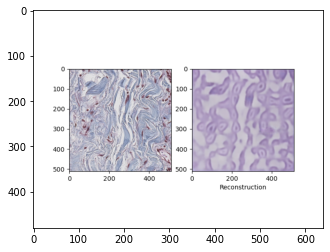

In [2]:
rootdir = '/gpfsscratch/rech/ohv/ueu39kt/TypicalAypical_fromMNISNOTMDN0609/outputImg'
f = 'TNE1413_12013_37885.png'
im = cv2.imread(os.path.join(rootdir, f))
plt.imshow(im)

# Loss analysis

In [38]:
rootdir = '/gpfsscratch/rech/ohv/ueu39kt/TypicalAypical_fromMNISNOTMDN0609/res'
lossfile = 'loss.csv'

In [39]:
df_loss = pd.read_csv(os.path.join(rootdir, lossfile), header = None, sep = '\t')

In [40]:
df_loss.head()

0         1         2
0  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.025451  0.819148
1  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.025451  0.819148
2  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.025451  0.819148
3  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.025451  0.819148
4  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.025451  0.819148

In [41]:
df_loss.shape

(31483783, 3)

In [42]:
df_loss =  df_loss.drop_duplicates()

In [43]:
df_loss.shape

(299481, 3)

In [10]:
df_loss.head()

0         1         2
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.025451  0.819148
106  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.041097  0.865526
211  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.018511  0.780191
317  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.031827  0.854862
423  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.057026  0.861072

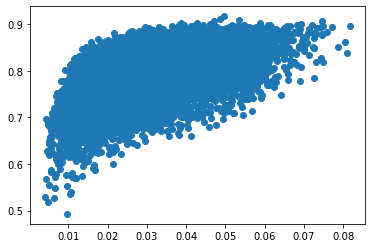

In [12]:

plt.scatter(
    df_loss.iloc[:10000, 1],
    df_loss.iloc[:10000, 2]

)

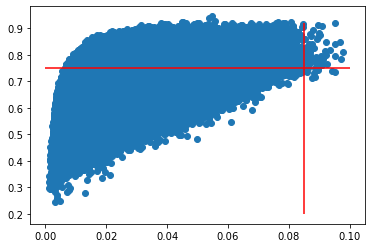

In [30]:
Xcond = 0.085
Ycond = 0.75
plt.scatter(
   df_loss.iloc[:, 1],
    df_loss.iloc[:, 2],

)
plt.vlines(x = Xcond, ymin = 0.2, ymax = 0.92, colors = 'r')
plt.hlines(y =Ycond , xmin = 0.00, xmax = 0.1, colors = 'r')

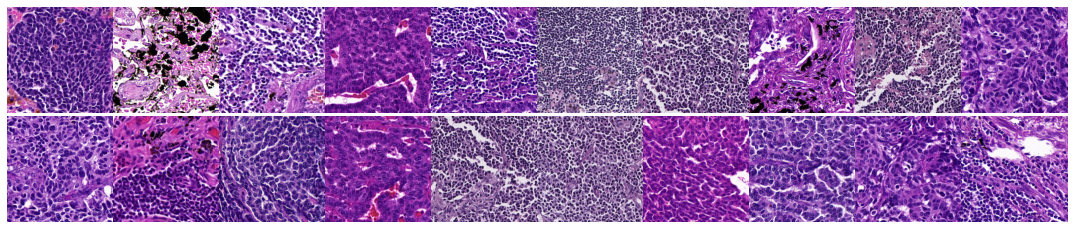

In [33]:
trc= list(set(df_loss[(df_loss.iloc[:,1] >= Xcond) & (df_loss.iloc[:,2] >= Ycond) ].iloc[:,0].values))
plot20Tiles(trc[:20])

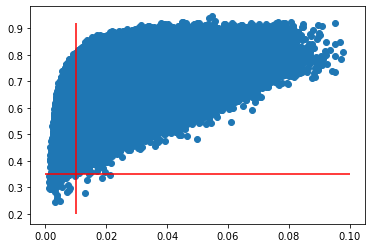

In [35]:
Xcond = 0.01
Ycond = 0.35
plt.scatter(
   df_loss.iloc[:, 1],
    df_loss.iloc[:, 2],

)
plt.vlines(x = Xcond, ymin = 0.2, ymax = 0.92, colors = 'r')
plt.hlines(y =Ycond , xmin = 0.00, xmax = 0.1, colors = 'r')

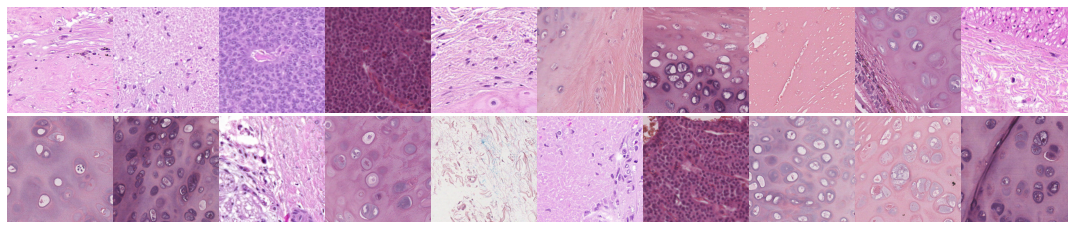

In [36]:
blc= list(set(df_loss[(df_loss.iloc[:,1] <= Xcond) & (df_loss.iloc[:,2] <= Ycond) ].iloc[:,0].values))
plot20Tiles(blc[:20])

## MIN MSE

In [19]:
to_print_c0 = list(set(df_loss.sort_values(by=1, axis=0, ascending = True).iloc[:20,0].values))

In [20]:
len(to_print_c0)

20

In [28]:
def plot20Tiles(list_tiles):
    c  = 0 
    fig, axs = plt.subplots(2,10, figsize=(19, 4), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace =0, wspace=0)
    row2 = False
    for ele in list_tiles:
        try:
            im = cv2.imread(ele)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            if row2 == False:
                if c < 10:
                    axs[0,c].imshow(im)
                    axs[0,c].axis('off')
                    c+=1
                elif c == 10:
                    c = 0 
                    row2 = True
                    axs[1,c].imshow(im)
                    axs[1,c].axis('off')
                    c +=1

            else:
                axs[1,c].imshow(im)
                axs[1,c].axis('off')
                c+=1
        except:
            print(ele)

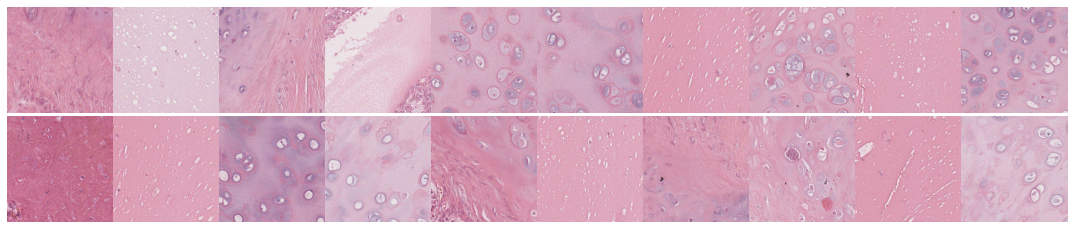

In [22]:
plot20Tiles(to_print_c0)

### Max MSE

In [23]:
to_print_c0 = list(set(df_loss.sort_values(by=1, axis=0, ascending = False).iloc[:20,0].values))

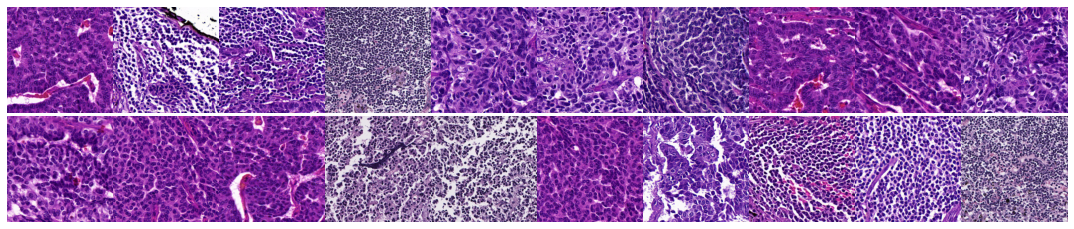

In [24]:
plot20Tiles(to_print_c0)

## Min SSIM

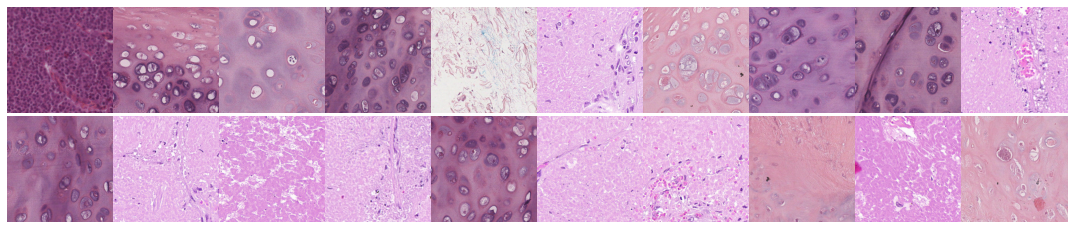

In [25]:
to_print_c0 = list(set(df_loss.sort_values(by=2, axis=0, ascending = True).iloc[:20,0].values))
plot20Tiles(to_print_c0)

### Max SSIM

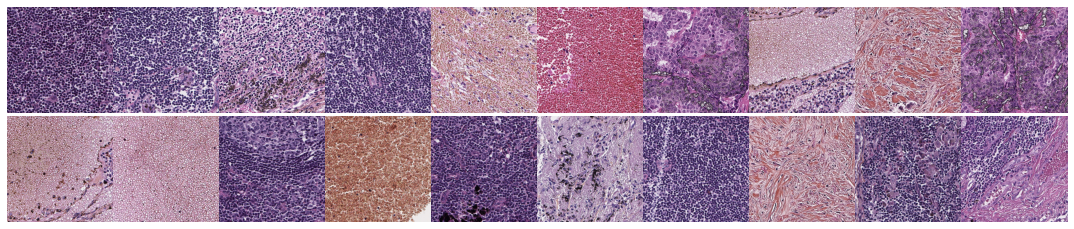

In [26]:
to_print_c0 = list(set(df_loss.sort_values(by=2, axis=0, ascending = False).iloc[:20,0].values))
plot20Tiles(to_print_c0)

## Sample extraction for atypicality maps

In [37]:
sample = []
for i in range(df_loss.shape[0]):
    sample.append(df_loss.iloc[i,0].split('/')[-3])
df_loss['sample'] = sample
df_loss.head()

0         1         2  \
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.025451  0.819148   
106  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.041097  0.865526   
211  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.018511  0.780191   
317  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.031827  0.854862   
423  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.057026  0.861072   

      sample  
0    TNE0001  
106  TNE0001  
211  TNE0001  
317  TNE0001  
423  TNE0001

In [41]:
df_loss_TNE0570 = df_loss[df_loss['sample'] == 'TNE0001']
df_loss_TNE0570.shape

(1201, 4)

In [43]:
df_loss_TNE0570.to_csv('/gpfsscratch/rech/ohv/ueu39kt/TypicalAypical_fromMNISNOTMDN0609/res/loss_TNE0001_MDN.csv')

# Typical IARC training set (up 75)

In [11]:
rootdir = '/gpfsscratch/rech/ohv/ueu39kt/TypicalAypical_fromMNISNOTMDN0609/res'
lossfile = 'loss_typical.csv'

In [12]:
df_loss_typical_train = pd.read_csv(os.path.join(rootdir, lossfile), header = None, sep = '\t')

In [13]:
df_loss_typical_train =  df_loss_typical_train.drop_duplicates()

In [14]:
df_loss_typical_train.head()

0         1         2
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.026641  0.752126
106  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.061071  0.799440
212  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.067396  0.867406
318  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.088812  0.873997
424  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.052552  0.887362

df_loss_typical_train.shape()

# Max MSE

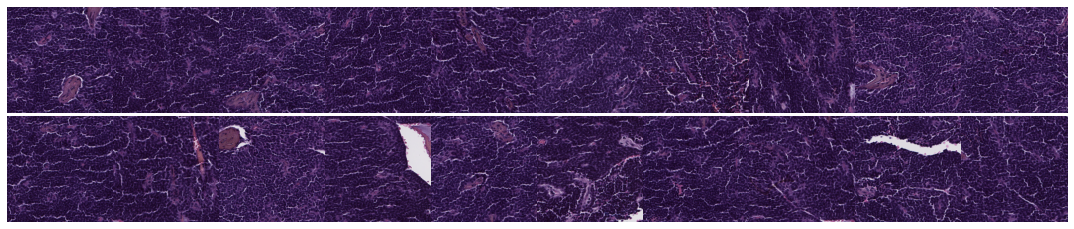

In [75]:
to_print_c0 = list(set(df_loss_typical_train.sort_values(by=1, axis=0, ascending = False).iloc[:20,0].values))
plot20Tiles(to_print_c0)

In [76]:
to_print_c0

['/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_48973_55441.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_52669_57289.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_47125_54517.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_44353_55441.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_54517_55441.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_35113_56365.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_62833_54517.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_50821_57289.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_1802/Tiles_512_512_1802/TNE0894/accept/TNE0894_44353_50821.jpg',
 

# Min MSE

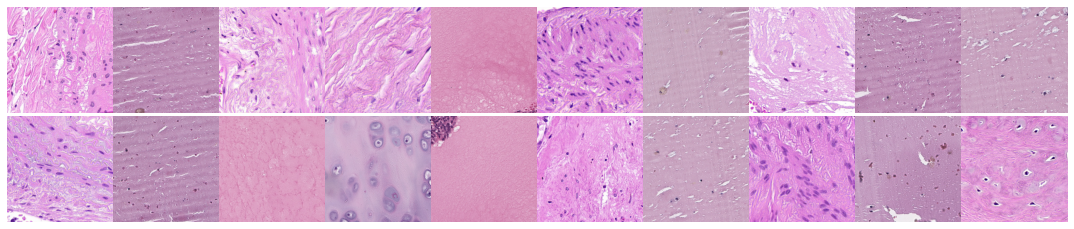

In [70]:
to_print_c0 = list(set(df_loss_typical_train.sort_values(by=1, axis=0, ascending = True).iloc[:20,0].values))
plot20Tiles(to_print_c0)

# Max SSIM

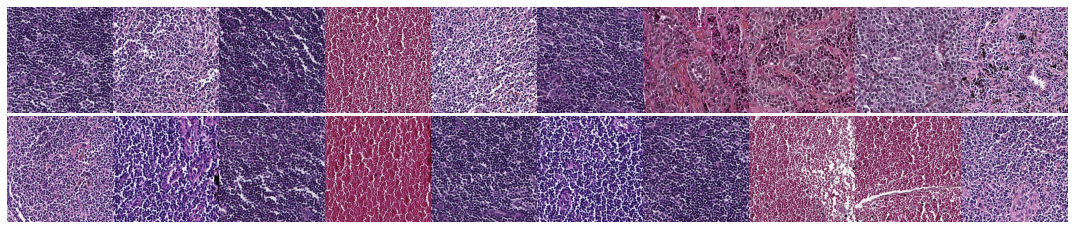

In [71]:
to_print_c0 = list(set(df_loss_typical_train.sort_values(by=2, axis=0, ascending = False).iloc[:20,0].values))
plot20Tiles(to_print_c0)

## Min SSIM

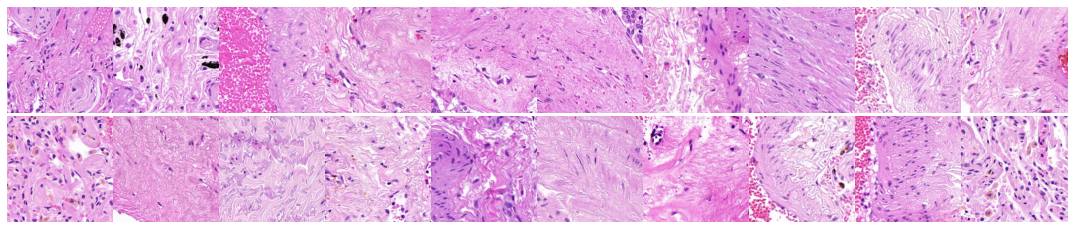

In [72]:
to_print_c0 = list(set(df_loss_typical_train.sort_values(by=2, axis=0, ascending = True).iloc[:20,0].values))
plot20Tiles(to_print_c0)

In [49]:
df_loss['Type'] = ['Test-Atypical'] * df_loss.shape[0]

In [17]:
df_loss_typical_train['Type'] = ['Train-Typical'] * df_loss_typical_train.shape[0]

In [18]:
df_loss_concat = df_loss_typical_train.append(df_loss, sort=False)

In [19]:
df_loss_concat.head()

0         1         2  \
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.026641  0.752126   
106  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.061071  0.799440   
212  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.067396  0.867406   
318  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.088812  0.873997   
424  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.052552  0.887362   

              Type  
0    Train-Typical  
106  Train-Typical  
212  Train-Typical  
318  Train-Typical  
424  Train-Typical

/gpfslocalsup/pub/anaconda-py3/2020.02/envs/pytorch-gpu-1.7.0/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1', ylabel='2'>

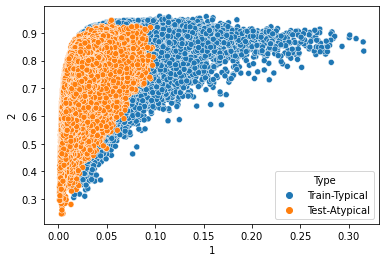

In [41]:
sns.scatterplot(df_loss_concat.iloc[:,1], df_loss_concat.iloc[:,2], hue=df_loss_concat['Type'])

In [20]:
def f_sample_id(df):
    sample_id = []
    for i in range(df.shape[0]):
        sample_id.append(df.iloc[i,0].split('/')[-3])
    return sample_id

In [21]:
df_loss_concat['Sample'] = f_sample_id(df_loss_concat)

In [24]:
set(df_loss_concat[df_loss_concat['Type'] == 'Train-Typical']['Sample'])

{'TNE0003',
 'TNE0004',
 'TNE0006',
 'TNE0009',
 'TNE0011',
 'TNE0016',
 'TNE0017',
 'TNE0018',
 'TNE0019',
 'TNE0025',
 'TNE0027',
 'TNE0028',
 'TNE0033',
 'TNE0056',
 'TNE0057',
 'TNE0058',
 'TNE0060',
 'TNE0061',
 'TNE0066',
 'TNE0067',
 'TNE0069',
 'TNE0071',
 'TNE0072',
 'TNE0073',
 'TNE0075',
 'TNE0077',
 'TNE0078',
 'TNE0079',
 'TNE0080',
 'TNE0081',
 'TNE0180',
 'TNE0181',
 'TNE0227',
 'TNE0228',
 'TNE0229',
 'TNE0230',
 'TNE0231',
 'TNE0232',
 'TNE0233',
 'TNE0234',
 'TNE0235',
 'TNE0263',
 'TNE0277',
 'TNE0278',
 'TNE0305',
 'TNE0306',
 'TNE0308',
 'TNE0340',
 'TNE0341',
 'TNE0360',
 'TNE0387',
 'TNE0390',
 'TNE0403',
 'TNE0405',
 'TNE0406',
 'TNE0407',
 'TNE0408',
 'TNE0450',
 'TNE0451',
 'TNE0452',
 'TNE0477',
 'TNE0478',
 'TNE0479',
 'TNE0480',
 'TNE0484',
 'TNE0485',
 'TNE0486',
 'TNE0487',
 'TNE0491',
 'TNE0498',
 'TNE0499',
 'TNE0500',
 'TNE0503',
 'TNE0504',
 'TNE0505',
 'TNE0508',
 'TNE0509',
 'TNE0510',
 'TNE0524',
 'TNE0525',
 'TNE0526',
 'TNE0528',
 'TNE0529',
 'TN

In [25]:
set(df_loss_concat[df_loss_concat['Type'] == 'Test-Atypical']['Sample'])

{'107-1',
 '107-2',
 '136',
 '143',
 '145',
 '154',
 '201',
 '214B',
 '247',
 '255',
 '258',
 '265',
 '271',
 '274',
 '278',
 '285',
 '301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309-1',
 '41',
 '65',
 '77',
 '96',
 'TNE0001',
 'TNE0002',
 'TNE0005',
 'TNE0007',
 'TNE0008',
 'TNE0015',
 'TNE0031',
 'TNE0034',
 'TNE0117',
 'TNE0286',
 'TNE0287',
 'TNE0288',
 'TNE0289',
 'TNE0404',
 'TNE0417',
 'TNE0493',
 'TNE0494',
 'TNE0495',
 'TNE0514',
 'TNE0515',
 'TNE0516',
 'TNE0519',
 'TNE0520',
 'TNE0521',
 'TNE0522',
 'TNE0534',
 'TNE0535',
 'TNE0536',
 'TNE0537',
 'TNE0563',
 'TNE0564',
 'TNE0565',
 'TNE0567',
 'TNE0568',
 'TNE0570',
 'TNE0574',
 'TNE0575',
 'TNE0576',
 'TNE0589',
 'TNE0590',
 'TNE0591',
 'TNE0774',
 'TNE0794',
 'TNE0795',
 'TNE0797',
 'TNE0798',
 'TNE0803',
 'TNE0805',
 'TNE0806',
 'TNE0809',
 'TNE0810',
 'TNE0859',
 'TNE0869',
 'TNE0880',
 'TNE0898',
 'TNE0950',
 'TNE0965',
 'TNE0973',
 'TNE0997',
 'TNE1010',
 'TNE1011',
 'TNE1019',
 'TNE1023',
 'TNE1075

In [27]:
set(df_loss_concat[df_loss_concat['Type'] == 'Test-Atypical']['Sample']).intersection(set(df_loss_concat[df_loss_concat['Type'] == 'Train-Typical']['Sample']))

set()

# Typical loss Test set CIRC from 75 to 1 

In [33]:
rootdir = '/gpfsscratch/rech/ohv/ueu39kt/TypicalAypical_fromMNISNOTMDN0609/res'
lossfile = 'loss_typical_test.csv'

In [34]:
df_loss_typical_test = pd.read_csv(os.path.join(rootdir, lossfile), header = None, sep = '\t')

In [35]:
df_loss_typical_test =  df_loss_typical_test.drop_duplicates()

In [36]:
df_loss_typical_test.head()

0         1         2
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.035678  0.824704
105  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.062783  0.783079
211  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.054970  0.791534
317  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.053724  0.858640
422  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.080101  0.775784

In [37]:
df_loss_typical_test.shape

(62280, 3)

In [48]:
df_loss_typical_test['Type'] = ['Test-Typical'] * df_loss_typical_test.shape[0]

In [51]:
df_loss_concat = df_loss_concat.append(df_loss_typical_test)

In [52]:
df_loss_concat.head()

0         1         2  \
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.026641  0.752126   
106  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.061071  0.799440   
212  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.067396  0.867406   
318  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.088812  0.873997   
424  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.052552  0.887362   

              Type  
0    Train-Typical  
106  Train-Typical  
212  Train-Typical  
318  Train-Typical  
424  Train-Typical

/gpfslocalsup/pub/anaconda-py3/2020.02/envs/pytorch-gpu-1.7.0/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1', ylabel='2'>

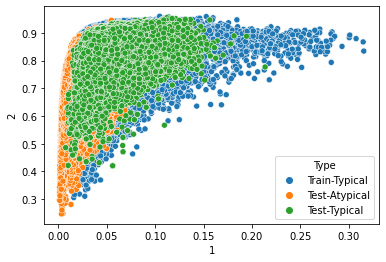

In [53]:
sns.scatterplot(df_loss_concat.iloc[:,1], df_loss_concat.iloc[:,2], hue=df_loss_concat['Type'])

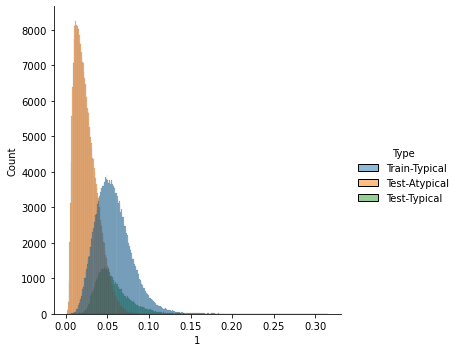

In [55]:
sns.displot( x=df_loss_concat.iloc[:,1], hue=df_loss_concat['Type'])

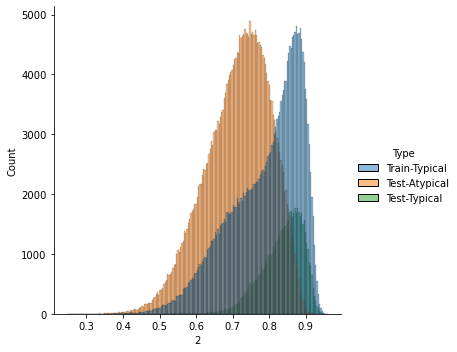

In [56]:
sns.displot( x=df_loss_concat.iloc[:,2], hue=df_loss_concat['Type'])

In [57]:
max(df_loss_concat.iloc[:,1])

0.31538859009742737

In [50]:
df_concat_test = df_loss_typical_test.append(df_loss)

In [58]:
set(df_concat_test['Type'])

{'Test-Atypical', 'Test-Typical'}

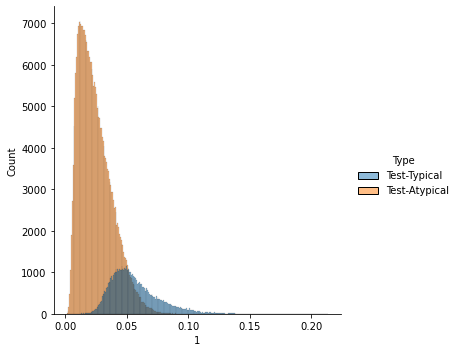

In [59]:
sns.displot( x=df_concat_test.iloc[:,1], hue=df_concat_test['Type'])

In [55]:
df_concat_test.head()

0         1         2  \
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.035678  0.824704   
105  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.062783  0.783079   
211  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.054970  0.791534   
317  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.053724  0.858640   
422  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.080101  0.775784   

             Type  
0    Test-Typical  
105  Test-Typical  
211  Test-Typical  
317  Test-Typical  
422  Test-Typical

<AxesSubplot:xlabel='1', ylabel='Frequency'>

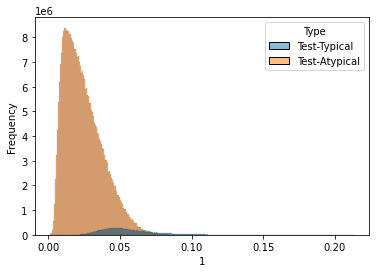

In [61]:
sns.histplot( x=df_concat_test.iloc[:,1], hue=df_concat_test['Type'], stat = 'frequency')

<AxesSubplot:xlabel='2', ylabel='Frequency'>

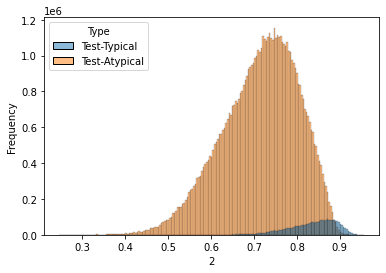

In [67]:
sns.histplot( x=df_concat_test.iloc[:,2], hue=df_concat_test['Type'], stat = 'frequency')

<AxesSubplot:xlabel='1', ylabel='Probability'>

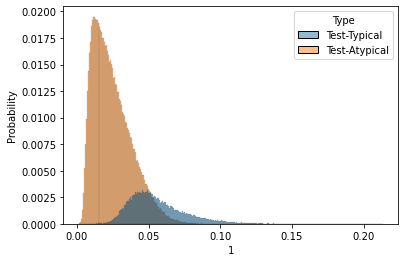

In [63]:
sns.histplot( x=df_concat_test.iloc[:,1], hue=df_concat_test['Type'], stat = 'probability')

<AxesSubplot:xlabel='2', ylabel='Probability'>

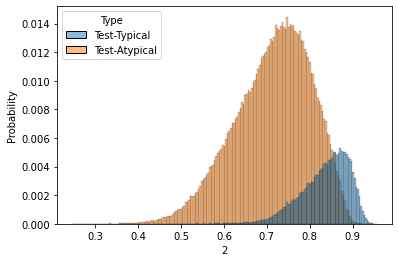

In [68]:
sns.histplot( x=df_concat_test.iloc[:,2], hue=df_concat_test['Type'], stat = 'probability')

In [65]:
df_concat_test[df_concat_test['Type'] == 'Test-Typical' ].shape


(62280, 4)

In [66]:
df_concat_test[df_concat_test['Type'] == 'Test-Atypical' ].shape


(299481, 4)

In [77]:
df_concat_test.head()

0         1         2  \
0    /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.035678  0.824704   
105  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.062783  0.783079   
211  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.054970  0.791534   
317  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.053724  0.858640   
422  /gpfsscratch/rech/ohv/ueu39kt/Tiles_512_512_18...  0.080101  0.775784   

             Type  
0    Test-Typical  
105  Test-Typical  
211  Test-Typical  
317  Test-Typical  
422  Test-Typical

In [ ]:
def f_sample_id(df):
    sample_id = []
    for i in range(df.shape[0]):
        sample_id.append(df.iloc[i,0].split('/')[-3])
    return sample_id

In [78]:
df_concat_test['Sample'] = f_sample_id(df_concat_test)

In [82]:
df_concat_test_by_sample  = df_concat_test.groupby('Sample').mean()

/gpfslocalsup/pub/anaconda-py3/2020.02/envs/pytorch-gpu-1.7.0/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1', ylabel='2'>

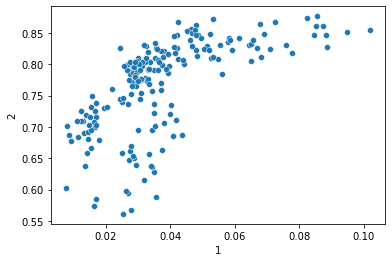

In [86]:
sns.scatterplot(df_concat_test_by_sample.iloc[:,0], df_concat_test_by_sample.iloc[:,1])

In [88]:
df_concat_test_by_sample.head()

1         2
Sample                    
107-1   0.012208  0.725410
107-2   0.015394  0.665522
136     0.008373  0.686746
143     0.016789  0.716365
145     0.009139  0.677348

In [100]:
Types = []
for i in range(df_concat_test_by_sample.shape[0]):
    Types.append(list(df_concat_test[df_concat_test['Sample'] == df_concat_test_by_sample.index[i]]['Type'])[0])

In [101]:
df_concat_test_by_sample['Type'] = Types

In [102]:
df_concat_test_by_sample.head()

1         2           Type
Sample                                   
107-1   0.012208  0.725410  Test-Atypical
107-2   0.015394  0.665522  Test-Atypical
136     0.008373  0.686746  Test-Atypical
143     0.016789  0.716365  Test-Atypical
145     0.009139  0.677348  Test-Atypical

<AxesSubplot:xlabel='1', ylabel='2'>

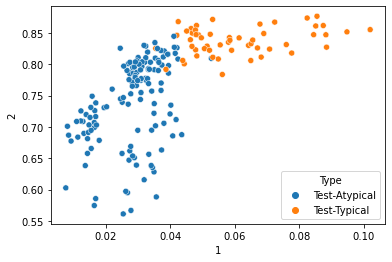

In [106]:
sns.scatterplot(df_concat_test_by_sample.iloc[:,0], 
                df_concat_test_by_sample.iloc[:,1], hue=df_concat_test_by_sample['Type'])

In [108]:
df_concat_test_by_sample[df_concat_test_by_sample['Type']=='Test-Typical'].shape[0]

54

In [109]:
df_concat_test_by_sample[df_concat_test_by_sample['Type']=='Test-Atypical'].shape[0]

140